Nama:

In [2]:
print("Hanun Masitha Ramadhani")

Hanun Masitha Ramadhani


(1) Gunakan X_train_final, X_test_final, y_train, dan y_test yang telah Anda buat pada HOA-4

In [3]:
import pandas as pd
df_employee = pd.read_csv('employee_missing.csv')
df_employee

,Unnamed: 0,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,...,1,80,0,8,0,1,6,4,0,5
1,1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,...,4,80,1,10,3,3,10,7,1,7
2,2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,...,2,80,0,7,3,3,0,0,0,0
3,3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,...,3,80,0,8,3,3,8,7,3,0
4,4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,...,3,80,1,17,3,3,5,2,0,3
2936,2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,...,1,80,1,9,5,3,7,7,1,7
2937,2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,2,80,1,6,0,3,6,2,0,3
2938,2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df_employee = df_employee.drop(["Over18", 'Unnamed: 0'], axis=1)

imputation on MonthlyIncome


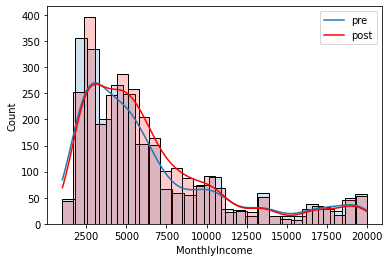

pre: mean: 6466.2209208400645, std: 4688.835392731094
post: mean: 6480.670068027211, std: 4383.015346864026


In [5]:
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

employee_number = df_employee.select_dtypes(include = 'number')

imputer_knn = KNNImputer(n_neighbors=5)
imputer_result = imputer_knn.fit_transform(employee_number)

imputer_result = pd.DataFrame(imputer_result)
imputer_result.columns = employee_number.columns

print("imputation on MonthlyIncome")

sns.histplot(employee_number['MonthlyIncome'], alpha=0.2, kde=True)
sns.histplot(imputer_result['MonthlyIncome'], alpha=0.2, kde=True, color='red')
plt.legend(['pre', 'post'])
plt.show()
print('pre: mean: {}, std: {}'.format(np.mean(employee_number['MonthlyIncome']), 
                                      np.std(employee_number['MonthlyIncome'])))
print('post: mean: {}, std: {}'.format(np.mean(imputer_result['MonthlyIncome']), 
                                      np.std(imputer_result['MonthlyIncome'])))

sscaler = StandardScaler()
scaler_result = sscaler.fit_transform(imputer_result)

scaler_result = pd.DataFrame(scaler_result)
scaler_result.columns = employee_number.columns

employee_number = scaler_result.copy()

imputation on JobRole


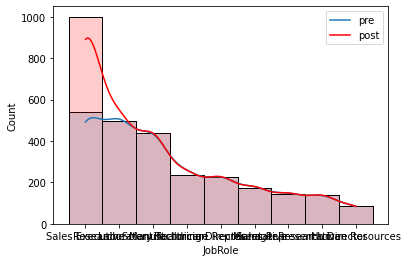

In [6]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder

employee_obj = df_employee.select_dtypes(include = 'object')

impute = SimpleImputer(strategy = 'most_frequent')
imputer_result = impute.fit_transform(employee_obj)

imputer_result = pd.DataFrame(imputer_result)
imputer_result.columns = employee_obj.columns

print("imputation on JobRole")

sns.histplot(employee_obj['JobRole'], alpha=0.2, kde=True)
sns.histplot(imputer_result['JobRole'], alpha=0.2, kde=True, color='red')
plt.legend(['pre', 'post'])
plt.show()

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
encoder_result = oe.fit_transform(imputer_result)

encoder_result = pd.DataFrame(encoder_result)
encoder_result.columns = employee_obj.columns

employee_obj = encoder_result.copy()

In [7]:
df_employee_transformed = pd.concat([employee_number, employee_obj], axis=1)
df_employee_transformed

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,-1.731462,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,...,-0.679146,0.245834,1.0,2.0,2.0,1.0,0.0,7.0,2.0,1.0
1,-1.730284,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,...,-0.368715,0.806541,0.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0
2,-1.729105,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,...,-0.679146,-1.155935,1.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0
3,-1.727927,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,...,0.252146,-1.155935,0.0,1.0,1.0,1.0,0.0,6.0,1.0,1.0
4,-1.726749,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,...,-0.058285,-0.595227,0.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,1.726749,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,...,-0.679146,-0.314873,0.0,1.0,1.0,3.0,1.0,2.0,1.0,0.0
2936,1.727927,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,...,-0.368715,0.806541,0.0,2.0,1.0,3.0,1.0,0.0,1.0,0.0
2937,1.729105,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,...,-0.679146,-0.314873,0.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0
2938,1.730284,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,...,-0.679146,1.086895,0.0,1.0,2.0,3.0,1.0,7.0,1.0,0.0


In [10]:
y = df_employee_transformed['Attrition']
df_employee_transformed = df_employee_transformed.drop(["Attrition"], axis=1)
X = df_employee_transformed.copy()

In [12]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X, y)
pd.DataFrame({'features': X.columns, 
             'mutual_info': mutual_info_classif(X, y)}).sort_values('mutual_info', ascending=False)

,features,mutual_info
11,MonthlyRate,0.134609
2,DailyRate,0.109042
10,MonthlyIncome,0.096045
18,TotalWorkingYears,0.042775
21,YearsAtCompany,0.031671
8,JobLevel,0.028718
17,StockOptionLevel,0.026904
22,YearsInCurrentRole,0.025730
1,Age,0.025171
24,YearsWithCurrManager,0.023764


In [14]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(score_func = mutual_info_classif, k=10)
X_final = kbest.fit_transform(X, y)

X_final = pd.DataFrame(X_final)
X_final.columns = X.columns[kbest.get_support()]
X_final

,Age,DailyRate,JobLevel,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,JobRole,OverTime
0,0.446350,0.742527,-0.057788,-0.111264,0.726020,-0.421642,-0.164613,0.245834,7.0,1.0
1,1.322365,-1.297775,-0.057788,-0.308160,1.488876,-0.164511,0.488508,0.806541,6.0,0.0
2,0.008343,1.414363,-0.961486,-1.001746,-1.674841,-0.550208,-1.144294,-1.155935,2.0,1.0
3,-0.429664,1.461466,-0.961486,0.610751,1.243211,-0.421642,0.161947,-1.155935,6.0,1.0
4,-1.086676,-0.524295,-0.961486,-0.687351,0.325900,-0.678774,-0.817734,-0.595227,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2935,-0.101159,0.202082,-0.057788,-0.892005,-0.284329,0.735447,-0.327893,-0.314873,2.0,0.0
2936,0.227347,-0.469754,0.845911,0.800894,1.004010,-0.293077,-0.001333,0.806541,0.0,0.0
2937,-1.086676,-1.605183,-0.057788,-0.544025,-1.284418,-0.678774,-0.164613,-0.314873,4.0,1.0
2938,1.322365,0.546677,-0.057788,-0.248840,-0.150393,0.735447,0.325228,1.086895,7.0,0.0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final,y, test_size=0.2, stratify = y)

print("Jumlah Data Train : {0}".format(len(X_train)))
print("Jumlah Data Test : {0}".format(len(X_test)))

Jumlah Data Train : 2352
Jumlah Data Test : 588


(2) Lakukan cross validation (k=4) menggunakan estimator logistic regression pada X_train_final dan y_train untuk menentukan hyperparameter 'penalty' yang optimal.

In [24]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gscv = GridSearchCV(LogisticRegression(), param_grid, cv=4)

gscv.fit(X_train, y_train)

c:\users\hanun\venv\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hanun\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hanun\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hanun\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\hanun\venv\lib\site-packages\sklearn\model_selection\_validation.py:610: Fit

c:\users\hanun\venv\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hanun\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hanun\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hanun\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\hanun\venv\lib\site-packages\sklearn\model_selection\_validation.py:

c:\users\hanun\venv\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hanun\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hanun\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hanun\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\hanun\venv\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test pa

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [27]:
best_param = gscv.best_params_
best_param

{'penalty': 'l1', 'solver': 'saga'}

(3) Buat learning alg. dengan menggunakan penalty optimal. Fit trainset ke learning alg. ini.

In [30]:
best_param['penalty']

alg_optimal = LogisticRegression(penalty = best_param['penalty'],
                                 solver = best_param['solver'])

In [31]:
alg_optimal.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

(4) Plot ROC-AUC curve. Plot precision-recall curve (threshold pada axis-x, precision dan recall pada axis-y). Tentukan threshold optimal untuk model classifier yang telah Anda buat.

In [56]:
logreg_df1 = pd.DataFrame(logreg_df)

logreg_df1['recall'] = logreg_df1['TP']/(logreg_df1['TP']+logreg_df1['FN'])
logreg_df1['precision'] = logreg_df1['TP']/(logreg_df1['TP']+logreg_df1['FP'])
logreg_df1['fpr'] = logreg_df1['FP']/(logreg_df1['TN']+logreg_df1['TP'])

In [57]:
logreg_df1.dropna()

,thre,TP,FP,TN,FN,recall,precision,fpr
0,0.00,379,1973,0,0,1.000000,0.161139,5.205805
1,0.05,360,1676,297,19,0.949868,0.176817,2.550989
2,0.10,314,1081,892,65,0.828496,0.225090,0.896352
3,0.15,259,675,1298,120,0.683377,0.277302,0.433526
4,0.20,221,405,1568,158,0.583113,0.353035,0.226383
5,0.25,192,270,1703,187,0.506596,0.415584,0.142480
6,0.30,153,194,1779,226,0.403694,0.440922,0.100414
7,0.35,118,129,1844,261,0.311346,0.477733,0.065749
8,0.40,88,92,1881,291,0.232190,0.488889,0.046724
9,0.45,66,39,1934,313,0.174142,0.628571,0.019500


c:\users\hanun\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

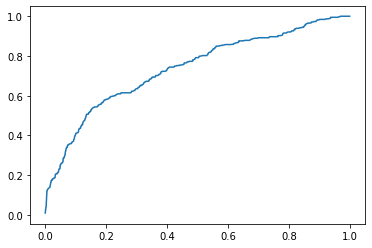

In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train, alg_optimal.predict_proba(X_train)[:,1])
sns.lineplot(fpr, tpr)

In [60]:
threshold

array([1.62473818, 0.62473818, 0.61946461, 0.61649707, 0.59854044,
       0.59046137, 0.58972681, 0.58727178, 0.57745574, 0.5615877 ,
       0.55762105, 0.55656457, 0.55211078, 0.55089012, 0.54492218,
       0.54230924, 0.53665276, 0.53546738, 0.53131907, 0.53126212,
       0.53064353, 0.52200993, 0.5212802 , 0.52098286, 0.51983647,
       0.51038555, 0.50945569, 0.50694223, 0.50595436, 0.50509119,
       0.50430565, 0.50391697, 0.50172562, 0.50133654, 0.49897272,
       0.49558947, 0.49547574, 0.49302657, 0.4926853 , 0.48924655,
       0.48924498, 0.48695551, 0.48492507, 0.47829105, 0.47399892,
       0.47398811, 0.47241325, 0.46839409, 0.46701947, 0.46578788,
       0.4651937 , 0.4614914 , 0.4601431 , 0.45969459, 0.45951334,
       0.45907266, 0.45639633, 0.4554002 , 0.4553058 , 0.45527685,
       0.45502938, 0.45394014, 0.45393359, 0.44489577, 0.44254578,
       0.43828861, 0.43771049, 0.4361669 , 0.43515056, 0.43314983,
       0.43094651, 0.4302705 , 0.42968129, 0.4295175 , 0.42776

(5) Hitung performance model Anda dengan menggunakan trainset dan testset:roc-auc-score, recall, precision, dan fpr.

In [65]:
#roc_auc_score
from sklearn.metrics import roc_auc_score
print("hasil roc auc score train set : {}".format(roc_auc_score(y_train, alg_optimal.predict_proba(X_train)[:,1])))
print("hasil roc auc score test set : {}".format(roc_auc_score(y_test, alg_optimal.predict_proba(X_test)[:,1])))

hasil roc auc score train set : 0.7366907071320343
hasil roc auc score test set : 0.7681221308850218


In [66]:
y_pred = alg_optimal.predict(X_test)
x_pred = alg_optimal.predict(X_train)

In [70]:
from sklearn.metrics import recall_score

print("hasil recall score train set : {}".format(recall_score(y_train, x_pred, average='weighted')))
print("hasil recall score test set : {}".format(recall_score(y_test, y_pred, average='weighted')))

hasil recall score train set : 0.8541666666666666
hasil recall score test set : 0.8554421768707483


In [71]:
from sklearn.metrics import precision_score

print("hasil precision score train set : {}".format(precision_score(y_train, x_pred, average='weighted')))
print("hasil precision score test set : {}".format(precision_score(y_test, y_pred, average='weighted')))

hasil precision score train set : 0.8495610896797744
hasil precision score test set : 0.8642644557823128


In [74]:
fpr2, tpr2, threshold2 = roc_curve(y_test, alg_optimal.predict_proba(X_test)[:,1])

print("hasil fpr score train: {}".format(fpr.mean()))
print("hasil fpr score test: {}".format(fpr2.mean()))

hasil fpr score train: 0.4205067804360909
hasil fpr score test: 0.3380975272309443
